In [2]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt


## Introduction

The **SWAP gate** is a fundamental two-qubit gate in quantum computing. Its primary purpose is to exchange the states of two qubits without any additional computational effects. This operation is particularly useful in scenarios where qubits need to be rearranged or when certain quantum operations require specific qubits to be adjacent.

The SWAP gate is a symmetric gate, meaning the order of the qubits does not matter. It is often decomposed into a series of simpler gates (e.g., CNOT gates) when implemented on hardware.

---

## Matrix Representation

The SWAP gate operates on two qubits and has the following matrix representation in the computational basis $$ \{ \ket{00}, \ket{01}, \ket{10}, \ket{11} \} $$

$$
SWAP = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}.
$$

---

## Action on Basis States

For any two qubits {a, b} , where  a, b in {0, 1}, the SWAP gate exchanges their states:

$$
SWAP \ket{a, b} = \ket{b, a}.
$$


 $$ SWAP \ket{00} = \ket{00} $$
 $$ SWAP \ket{01} = \ket{10} $$
 $$ SWAP \ket{10} = \ket{01} $$
 $$ SWAP \ket{11} = \ket{11} $$

---

## Decomposition Using CNOT Gates

In physical implementations, the SWAP gate is often decomposed into a sequence of three CNOT gates:

1. Apply \( CNOT_{1,2} \): The first qubit controls the second qubit.
2. Apply \( CNOT_{2,1} \): The second qubit controls the first qubit.
3. Apply \( CNOT_{1,2} \) again.

This sequence ensures the states of the two qubits are exchanged.

---

## Example Transformation

Consider the state:

$$
\ket{\psi} = \alpha \ket{01} + \beta \ket{10}.
$$

Applying the SWAP gate:

$$
SWAP \ket{\psi} = SWAP (\alpha \ket{01} + \beta \ket{10}) = \alpha \ket{10} + \beta \ket{01}.
$$

Thus, the SWAP gate exchanges the amplitudes associated with 01 and 10.


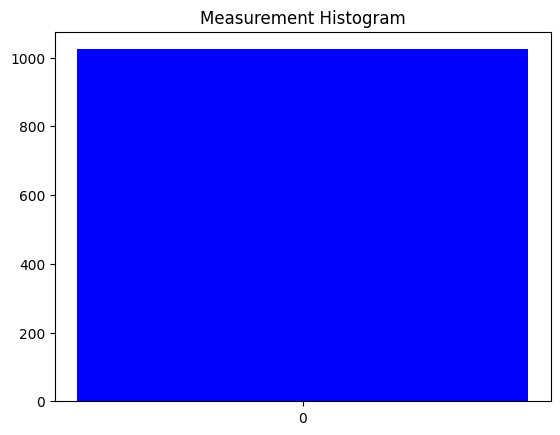

Quantum Circuit


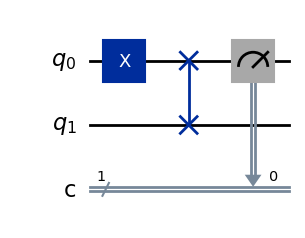

In [4]:
qc = QuantumCircuit(2, 1)

qc.x(0)

qc.swap(0,1)

qc.measure(0, 0)

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()


counts = result.get_counts()


plt.bar(counts.keys(), counts.values(), color='blue')
plt.title("Measurement Histogram")
plt.show()

print("Quantum Circuit")
qc.draw('mpl')

# Applications and Exercises for SWAP Gate

## Applications

1. **Reordering Qubits**:  
   The SWAP gate is primarily used to exchange the positions of two qubits in a quantum circuit. This is particularly useful when hardware connectivity constraints require specific qubits to be adjacent.

2. **Quantum Algorithm Optimization**:  
   In quantum algorithms, the SWAP gate can be employed to rearrange qubits for efficient computation or to match the logical qubit arrangement to the physical qubit layout of quantum hardware.

3. **Quantum Circuit Design**:  
   By combining SWAP gates with other quantum gates, complex operations can be decomposed and implemented efficiently, even when qubits are not physically close.

---



## Exercises

### Exercise 1: State Swapping
Apply the SWAP gate to the state:  
$$
\ket{\psi} = \alpha \ket{01} + \beta \ket{10}.
$$  
Show the resulting state.

**Solution**:  
The SWAP gate exchanges the states of the two qubits:  
$$
SWAP \ket{\psi} = SWAP (\alpha \ket{01} + \beta \ket{10}) = \alpha \ket{10} + \beta \ket{01}.
$$

---

### Exercise 2: Basis State Transformation
Verify the action of the SWAP gate on the basis state 01.  
**Solution**:  
Using the definition of the SWAP gate:  
$$
SWAP \ket{01} = \ket{10}.
$$

---

### Exercise 3: SWAP Gate Decomposition
Decompose the SWAP gate into a sequence of three CNOT gates and verify its action on the state:  
$$
\ket{\psi} = \frac{1}{\sqrt{2}} (\ket{01} + \ket{10}).
$$

**Hint**: Use the following CNOT sequence:  
1. Apply \( CNOT_{1,2} \).  
2. Apply \( CNOT_{2,1} \).  
3. Apply \( CNOT_{1,2} \) again.

**Solution**:  
1. Initial state:  
   $$
   \ket{\psi} = \frac{1}{\sqrt{2}} (\ket{01} + \ket{10}).
   $$

2. After the first \( CNOT_{1,2} \):  
   $$
   \frac{1}{\sqrt{2}} (\ket{01} + \ket{11}).
   $$

3. After \( CNOT_{2,1} \):  
   $$
   \frac{1}{\sqrt{2}} (\ket{10} + \ket{11}).
   $$

4. After the final \( CNOT_{1,2} \):  
   $$
   \frac{1}{\sqrt{2}} (\ket{10} + \ket{01}).
   $$

Thus, the decomposition swaps the qubit states, as expected.

---

### Exercise 4: Entanglement Preservation
Show that the SWAP gate preserves entanglement by applying it to the Bell state:  
$$
\ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}).
$$

**Solution**:  
1. Initial state:  
   $$
   \ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}).
   $$

2. Applying the SWAP gate:  
   $$
   SWAP \ket{\Phi^+} = SWAP \left( \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}) \right).
   $$

3. Since 00 and 11 remain unchanged under SWAP:  
   $$
   SWAP \ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}).
   $$

The Bell state is preserved, demonstrating that the SWAP gate does not affect entanglement.

---

### Exercise 5: Circuit Simulation
Simulate a quantum circuit with three qubits in the initial state 100, and use the SWAP gate to exchange the first and second qubits.  
Verify the final state.

**Solution**:  
1. Initial state:  
   $$
   \ket{\psi} = \ket{100}.
   $$

2. After applying the SWAP gate to qubits 1 and 2:  
   $$
   SWAP \ket{100} = \ket{010}.
   $$

The states of the first two qubits are exchanged.
